# Episode Generator

In [26]:
%matplotlib notebook
import IPython.display
from utils_demo import *
from sys import platform
import sys
from PIL import Image
import matplotlib.pyplot as plt

sys.path.append('../simulation')
from unity_simulator.comm_unity import UnityCommunication
from unity_simulator import utils_viz

In [27]:
mode = 'manual' # auto / manual
if mode == 'auto':
    if platform == 'darwin':
        exec_file = '../simulation/macos_exec'
    else:
        exec_file = '../simulation/exec_linux.x86_64'
    comm = UnityCommunication(file_name=exec_file)
else:
    comm = UnityCommunication()

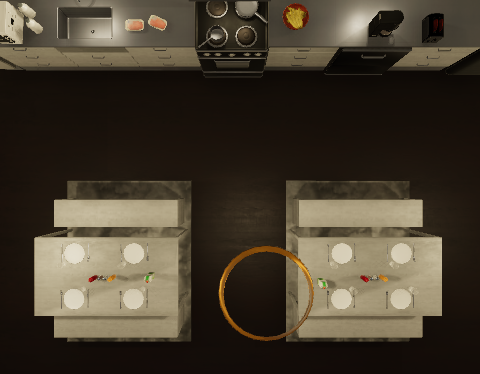

{'nodes': [{'id': 11,
   'category': 'Rooms',
   'class_name': 'kitchen',
   'prefab_name': 'PRE_ROO_Kitchen_05',
   'obj_transform': {'position': [0.0, 0.0, 0.0],
    'rotation': [0.0, 0.0, 0.0, 1.0],
    'scale': [1.0, 1.0, 1.0]},
   'bounding_box': {'center': [-3.75, 1.25, 3.75], 'size': [8.0, 3.0, 10.5]},
   'properties': [],
   'states': []},
  {'id': 12,
   'category': 'Walls',
   'class_name': 'wall',
   'prefab_name': 'PRE_WAL_WAL_Straight_06_01',
   'obj_transform': {'position': [-7.5, 0.0, 2.5],
    'rotation': [0.0, 0.0, 0.0, -1.0],
    'scale': [1.0, 1.0, 1.0]},
   'bounding_box': {'center': [-7.47, 1.24999988, 2.49999523],
    'size': [0.06000071, 2.50000882, 2.50000954]},
   'properties': [],
   'states': []},
  {'id': 13,
   'category': 'Walls',
   'class_name': 'wall',
   'prefab_name': 'PRE_WAL_WAL_Doorway_06_01',
   'obj_transform': {'position': [-3.75, 0.0, -1.25],
    'rotation': [0.0, -0.7071068, 0.0, 0.7071068],
    'scale': [1.0, 1.0, 1.0]},
   'bounding_box': {'

In [28]:
# Reset the scene
comm.reset(2)
comm.add_camera(position=[-4.75,5.5,3.5], rotation=[90, 0, 90])

#Display scene
s, c = comm.camera_count()
img_final = display_scene_cameras(comm, [c-1], nrows=1)
IPython.display.display(img_final)

# Get graph
s, graph = comm.environment_graph()
graph



In [29]:
#Objects we want to delete
plate_ids = set([67,76,83,103])
plates = find_nodes(graph, class_name='plate')
#Remove edges
for edge in graph["edges"]:
    if edge["from_id"] in plate_ids:
        graph["edges"].remove(edge)
#Remove nodes
for p in plates:
    if p['id'] in plate_ids:
        graph['nodes'].remove(p)
#graph

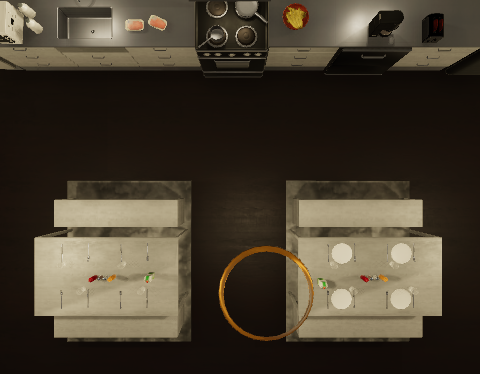

In [30]:
comm.expand_scene(graph)
img_final = display_scene_cameras(comm, [c-1], nrows=1)
IPython.display.display(img_final)

In [31]:
# Add new nodes & edges

next_id = graph['nodes'][-1]['id'] +1
add_node(graph, {'class_name': 'cat', 
                   'category': 'Animals', 
                   'id': next_id, 
                   'properties': [], 
                   'states': []})
add_edge(graph, next_id, 'ON', 132)

next_id += 1
graph

{'nodes': [{'id': 11,
   'category': 'Rooms',
   'class_name': 'kitchen',
   'prefab_name': 'PRE_ROO_Kitchen_05',
   'obj_transform': {'position': [0.0, 0.0, 0.0],
    'rotation': [0.0, 0.0, 0.0, 1.0],
    'scale': [1.0, 1.0, 1.0]},
   'bounding_box': {'center': [-3.75, 1.25, 3.75], 'size': [8.0, 3.0, 10.5]},
   'properties': [],
   'states': []},
  {'id': 12,
   'category': 'Walls',
   'class_name': 'wall',
   'prefab_name': 'PRE_WAL_WAL_Straight_06_01',
   'obj_transform': {'position': [-7.5, 0.0, 2.5],
    'rotation': [0.0, 0.0, 0.0, -1.0],
    'scale': [1.0, 1.0, 1.0]},
   'bounding_box': {'center': [-7.47, 1.24999988, 2.49999523],
    'size': [0.06000071, 2.50000882, 2.50000954]},
   'properties': [],
   'states': []},
  {'id': 13,
   'category': 'Walls',
   'class_name': 'wall',
   'prefab_name': 'PRE_WAL_WAL_Doorway_06_01',
   'obj_transform': {'position': [-3.75, 0.0, -1.25],
    'rotation': [0.0, -0.7071068, 0.0, 0.7071068],
    'scale': [1.0, 1.0, 1.0]},
   'bounding_box': {'

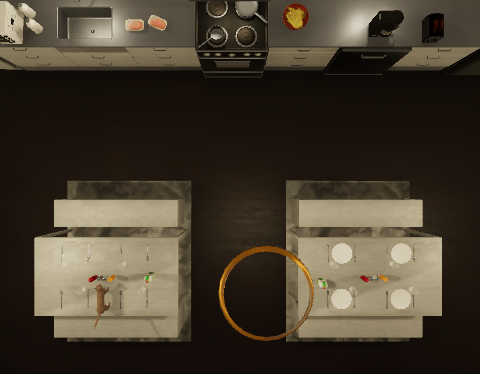

In [32]:
#Display scene
comm.expand_scene(graph)
img_final = display_scene_cameras(comm, [c-1], nrows=1)
IPython.display.display(img_final)

In [33]:
# Add set of tasks 

tasks = [{"task": "put_{plate}_in_{dishwasher}", "repetitions": 4}, 
 {"task": "put_{cutleryfork}_in_{dishwasher}", "repetitions": 4}, 
 {"task": "put_{cutleryknife}_in_{dishwasher}", "repetitions": 4}, 
 {"task": "put_{waterglass}_in_{dishwasher}", "repetitions": 4}]

In [34]:
newgraph = {}

In [35]:
# Add new stuff
newgraph["init_graph"] = graph
newgraph["task_id"] = 0
newgraph["task_name"] = "clear_kitchentable"
newgraph["env_id"] = 2
newgraph["task_goal"] = tasks
newgraph["goal_id"] = 0
newgraph["level"] = 0
newgraph["init_rooms"] =  ["kitchen", "livingroom"]
newgraph

{'init_graph': {'nodes': [{'id': 11,
    'category': 'Rooms',
    'class_name': 'kitchen',
    'prefab_name': 'PRE_ROO_Kitchen_05',
    'obj_transform': {'position': [0.0, 0.0, 0.0],
     'rotation': [0.0, 0.0, 0.0, 1.0],
     'scale': [1.0, 1.0, 1.0]},
    'bounding_box': {'center': [-3.75, 1.25, 3.75], 'size': [8.0, 3.0, 10.5]},
    'properties': [],
    'states': []},
   {'id': 12,
    'category': 'Walls',
    'class_name': 'wall',
    'prefab_name': 'PRE_WAL_WAL_Straight_06_01',
    'obj_transform': {'position': [-7.5, 0.0, 2.5],
     'rotation': [0.0, 0.0, 0.0, -1.0],
     'scale': [1.0, 1.0, 1.0]},
    'bounding_box': {'center': [-7.47, 1.24999988, 2.49999523],
     'size': [0.06000071, 2.50000882, 2.50000954]},
    'properties': [],
    'states': []},
   {'id': 13,
    'category': 'Walls',
    'class_name': 'wall',
    'prefab_name': 'PRE_WAL_WAL_Doorway_06_01',
    'obj_transform': {'position': [-3.75, 0.0, -1.25],
     'rotation': [0.0, -0.7071068, 0.0, 0.7071068],
     'scale

In [36]:
import json
with open('pilot_task_id_10_bounds.json', 'w+') as f: f.write(json.dumps(newgraph, indent=4))